# Trabajo práctico número 1

## Hacer un programa que utilice un Algoritmo Genético Canónico para buscar un máximo de la función:

#### f(x) = (x/coef)2 en el dominio [0 , 2^(30 - 1)]
donde coef = 2^(30-1)
teniendo en cuenta los siguientes datos:

1– Probabilidad de Crossover = 0,75

2– Probabilidad de Mutación = 0,05

3– Población Inicial: 10 individuos

4– Ciclos del programa: 200

5– Método de Selección: Ruleta

6– Método de Crossover: 1 Punto

7– Método de Mutación: invertida

#### El espacio solución estara formado por cromosomas de longitud 30
 y cada gen sera un dígito
binario 0 o 1

### Constantes

In [467]:
PROB_CROSSOVER = 0.75
PROB_MUTACION = 0.05
CICLOS = 200
CANTIDAD_POBLACION = 10
COEF = 1073741823 # 2^29
CANTIDAD_GENES = 30
ITERACIONES_IMPRIMIBLES = [20, 100, 200]

### Librerías necesarias

In [468]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Generando población inicial aleatoria

In [469]:
def poblacionInicial():
    rng = np.random.default_rng() # Random Number Generator
    # El 12345 es la semilla, poner sin semilla para q en cada ejecución genere nuevos aleatorios.
    poblacion_decimal = rng.integers(low=0, high=COEF, size=CANTIDAD_POBLACION)
    return poblacion_decimal
poblacion_decimal = poblacionInicial()
poblacion_decimal

array([ 100545602, 1065439667,    4267144,  158350922,  896761046,
          9155166,  835286958,  718252253,  915578448,  138530196],
      dtype=int64)

#### Convirtiendo la población inicial a binario

In [470]:
def convertirPoblacion(pob_ini, bin=True): # Pasar False para convertir a decimal
    pob_fin = []
    for numero in pob_ini:
        if bin:
            # convirtiendo cada número decimal en binario de 8 dígitos.
            pob_fin.append(format(numero,'030b'))
        else:
            pob_fin.append(int(str(numero), 2))
    return pob_fin

poblacion_binarios= convertirPoblacion(poblacion_decimal)
poblacion_binarios

['000101111111100011010001000010',
 '111111100000010101000110110011',
 '000000010000010001110010001000',
 '001001011100000011111001001010',
 '110101011100110111110011010110',
 '000000100010111011001001011110',
 '110001110010010111011110101110',
 '101010110011111010100011011101',
 '110110100100101001111001010000',
 '001000010000011100110110010100']

### Función objetivo

In [471]:
#(x/coef)2
# Pasar población decimal
def funcionObjetivo(pob):
    colObjetivo=[]
    # El nombre cromosoma es por semántica, en realidad va a trabajar con cada valor decimal
    for cromosoma in pob:
        colObjetivo.append((int(cromosoma)/int(COEF))**2) #TODO preguntar por esto. lo saque así de la consigna 
    #convertir lista en numpy arrray (para operaciones matemáticas)
    npColObjetivo = np.array(colObjetivo)
    return npColObjetivo

### Generando un marco de datos

In [472]:
def generarDataFrame(pob_dec, pob_bin): #TODO refactor: se puede hacer con un solo parametro.
    data = {'Decimales': pob_dec, 'Binarios': pob_bin, 'FuncionObjetivo':funcionObjetivo(pob_dec)}
    dataFrame = pd.DataFrame(data)
    dataFrame['Fitness'] = dataFrame['FuncionObjetivo'] / dataFrame['FuncionObjetivo'].sum()
    return dataFrame

marcoDeDatos = generarDataFrame(poblacion_decimal, poblacion_binarios)
display(marcoDeDatos)

,Decimales,Binarios,FuncionObjetivo,Fitness
0,100545602,000101111111100011010001000010,0.008769,0.002499
1,1065439667,111111100000010101000110110011,0.984596,0.280585
2,4267144,000000010000010001110010001000,0.000016,0.000005
3,158350922,001001011100000011111001001010,0.021749,0.006198
4,896761046,110101011100110111110011010110,0.697515,0.198774
5,9155166,000000100010111011001001011110,0.000073,0.000021
6,835286958,110001110010010111011110101110,0.605162,0.172456
7,718252253,101010110011111010100011011101,0.447460,0.127515
8,915578448,110110100100101001111001010000,0.727095,0.207204
9,138530196,001000010000011100110110010100,0.016645,0.004743


#### Estadisticas

In [473]:
def generarEstadisticas(dataFrame):
    stats = {'Suma':[ dataFrame['FuncionObjetivo'].sum(), dataFrame['Fitness'].sum() ], 'Promedio': [ dataFrame['FuncionObjetivo'].mean(), dataFrame['Fitness'].mean() ], 'Máximo': [ dataFrame['FuncionObjetivo'].max(), dataFrame['Fitness'].max() ], 'Mínimo': [ dataFrame['FuncionObjetivo'].min(), dataFrame['Fitness'].min() ]}
    dataFrame_stats = pd.DataFrame(stats, index = ['Función objetivo', 'Fitness'])
    return dataFrame_stats, stats

marcoDeDatos_stats, stats = generarEstadisticas(marcoDeDatos)

display(marcoDeDatos_stats)

,Suma,Promedio,Máximo,Mínimo
Función objetivo,3.50908,0.350908,0.984596,0.000016
Fitness,1.00000,0.100000,0.280585,0.000005


### Generando una nueva población a partir de otra

Selección de padres para la próxima generación

#### Elitismo

In [474]:
def elitismo(pob_bin, cantidad):
    fitness = list(marcoDeDatos['Fitness']).copy()
    no_elites = pob_bin.copy()
    elites = []
    for i in range(0, cantidad):
        # busca cual es cromosoma con mayor fitness
        ganador = max(fitness)
        indiceGanador = fitness.index(ganador)
        cromosomaGanador = no_elites[indiceGanador]
        # agrega el cromosoma a la lista de elites y lo elimina de la lista de cromosomas para buscar el siguiente
        elites.append(cromosomaGanador)
        fitness.remove(ganador)
        no_elites.remove(cromosomaGanador)
    return [elites, no_elites]

elit, noElit = elitismo(poblacion_binarios, 2)
print(elit, noElit)

['111111100000010101000110110011', '110110100100101001111001010000'] ['000101111111100011010001000010', '000000010000010001110010001000', '001001011100000011111001001010', '110101011100110111110011010110', '000000100010111011001001011110', '110001110010010111011110101110', '101010110011111010100011011101', '001000010000011100110110010100']


#### Método ruleta

In [475]:
def ruleta(dataFrame, cantPoblacion): #pasar marco de datos
    # TODO PREGUNTAR RULETA ALEATORIA O BASADA EN PROPORCIONES
    probabilidades = np.array(dataFrame['Fitness']) #Asigna probabilidad basada en el fitness
    cromosomas = np.array(dataFrame['Binarios'])
    np.random.seed() 
    salida = list(np.random.choice(cromosomas, size=int(cantPoblacion), p=probabilidades))
    return salida

cromosomasPadresRuleta = ruleta(marcoDeDatos, 10)
cromosomasPadresRuleta

['111111100000010101000110110011',
 '111111100000010101000110110011',
 '110101011100110111110011010110',
 '110101011100110111110011010110',
 '110110100100101001111001010000',
 '111111100000010101000110110011',
 '111111100000010101000110110011',
 '101010110011111010100011011101',
 '110001110010010111011110101110',
 '111111100000010101000110110011']

#### Método torneo

In [476]:
def torneo(dataFrame, cantPoblacion):
    salida = []
    fitness = np.array(dataFrame['Fitness'])
    cromosomas = np.array(dataFrame['Binarios'])
    for i in range(0, cantPoblacion):
        posiblesCantidades = [ x for x in range(1,cantPoblacion+1)]
        np.random.seed() 
        cantidadMiembrosTorneo = np.random.choice(posiblesCantidades, size=1)
        miembrosTorneo = np.random.choice(fitness, size=cantidadMiembrosTorneo[0], replace=False) #Trabaja directamente con los fitness de los cromósomas
        ganador = np.amax(miembrosTorneo)
        indiceGanador = np.where(fitness == ganador) # retorna ndarray
        cromosomaGanador = cromosomas[indiceGanador[0][0]]
        salida.append(cromosomaGanador)
    return salida

cromosomasPadresTorneo = torneo(marcoDeDatos, 10)
cromosomasPadresTorneo

['111111100000010101000110110011',
 '111111100000010101000110110011',
 '111111100000010101000110110011',
 '111111100000010101000110110011',
 '110110100100101001111001010000',
 '111111100000010101000110110011',
 '111111100000010101000110110011',
 '110101011100110111110011010110',
 '111111100000010101000110110011',
 '110110100100101001111001010000']

Test de prueba (podemos borrar desp)

In [477]:
fitness = np.array(marcoDeDatos['Fitness'])
cromosomas = np.array(marcoDeDatos['Binarios'])
posiblesCantidades = [ x for x in range(1,11)]
cantidadMiembrosTorneo = np.random.choice(posiblesCantidades, size=1)
miembrosTorneo = np.random.choice(fitness, size=cantidadMiembrosTorneo[0], replace=False) #Trabaja directamente con los fitness de los cromósomas
ganador = np.amax(miembrosTorneo)
indiceGanador = np.where(fitness == ganador)
print(miembrosTorneo)
print("Cantidad: "+str(cantidadMiembrosTorneo[0]))
print("Fitness ganador: "+str(ganador))
print("Indice: "+str(indiceGanador[0][0]))
print("Cromosoma: "+str(cromosomas[indiceGanador[0][0]]))

[2.80585182e-01 2.49880960e-03 4.50071597e-06 4.74346725e-03
 6.19795190e-03 2.07176005e-05 2.07203998e-01]
Cantidad: 7
Fitness ganador: 0.2805851823666454
Indice: 1
Cromosoma: 111111100000010101000110110011


#### Crossover

In [478]:
def crossover(padres): #Pasar ndarray cromosomas padres
    hijos = []
    for i in range(0,10,2):
        opciones=[True, False]
        np.random.seed() 
        prob_cross = np.array([PROB_CROSSOVER,(1-PROB_CROSSOVER)]) # Probabilidades de cada opción
        cross = np.random.choice(opciones, size=1, p=prob_cross)
        if cross[0]:
            posiciones = [x for x in range(0, CANTIDAD_GENES)]
            probCorte = [1/CANTIDAD_GENES for x in range(0, CANTIDAD_GENES)]
            corte = np.random.choice(posiciones, size=1, p=probCorte) # Devuelve ndarray de 1 elemento
            posicionCorte = corte[0] 
            primerTiraGenesPadre1 = padres[i][0:posicionCorte]
            segundaTiraGenesPadre1 = padres[i][posicionCorte:CANTIDAD_GENES]
            primerTiraGenesPadre2 = padres[i+1][0:posicionCorte]
            segundaTiraGenesPadre2 = padres[i+1][posicionCorte:CANTIDAD_GENES]
            hijos.append(primerTiraGenesPadre1 + segundaTiraGenesPadre2) # Hijo 1
            hijos.append(primerTiraGenesPadre2 + segundaTiraGenesPadre1) # Hijo 2
        else:
            hijos.append(padres[i])
            hijos.append(padres[i+1])
    return hijos

##### Crossover ruleta

In [479]:
cromosomasHijosRuleta = crossover(cromosomasPadresRuleta)
cromosomasHijosRuleta

['111111100000010101000110110011',
 '111111100000010101000110110011',
 '110101011100110111110011010110',
 '110101011100110111110011010110',
 '110110100100101001111110110011',
 '111111100000010101000001010000',
 '111111100011111010100011011101',
 '101010110000010101000110110011',
 '110001110010010111011110101110',
 '111111100000010101000110110011']

##### Crossover torneo

In [480]:
cromosomasHijosTorneo = crossover(cromosomasPadresTorneo)
print(cromosomasHijosTorneo)

['111111100000010101000110110011', '111111100000010101000110110011', '111111100000010101000110110011', '111111100000010101000110110011', '110111100000010101000110110011', '111110100100101001111001010000', '111111100000010101000110110110', '110101011100110111110011010011', '111111100000010101000110110011', '110110100100101001111001010000']


#### Mutación

In [481]:
def mutacion(cromosomas):
    hijos = []
    rng = np.random.default_rng() # Random Number Generator
    for i in range(0,10):
        mutar = rng.random()
        
        if (PROB_MUTACION > mutar):
            posicion = rng.integers(low=0, high=29, size=1)
            #print("Posición: " + str(posicion))
            #print(cromosomas[i][posicion[0]])
            #print(cromosomas[i])
            if ( int(cromosomas[i][posicion[0]]) == 1 ):
                cromosoma = list(cromosomas[i]) # Convierte el lista al cromosoma seleccionado
                # Lo hice así porque python no permite asignar valores a una pisición de un array
                #print(cromosomas[i])
                cromosoma[posicion[0]] = '0' # cambia el gen indicado
                cromosomaMutado =''.join(cromosoma)  # volverlo a convertir en int (o podría ser a array)
                #print(cromosomaMutado)
                hijos.append(cromosomaMutado)
                
            else:
                cromosoma = list(cromosomas[i]) 
                #print(cromosomas[i])
                cromosoma[posicion[0]] = '1' # cambia el gen indicado
                cromosomaMutado =''.join(cromosoma)
                #print(cromosomaMutado)
                hijos.append(cromosomaMutado)
                
        else:
            hijos.append(cromosomas[i])
    return hijos 

hijosmutados = mutacion(cromosomasHijosRuleta)

hijosmutados

['111111100000010101000110110011',
 '111111100000010101000110110011',
 '110101011100110111110011010110',
 '110101011100110111110011010110',
 '110110100100101001111110110011',
 '111111100000010101000001010000',
 '111111100011111010100011011101',
 '101010110000010101000110110011',
 '110001110010010111011110101110',
 '111111100000010101000110110011']

### Gráficos

In [482]:
def hacerGrafico(estadisticas, iteracion):
    estadisticas["Iteración"]=[x for x in range(1,iteracion+1)]
    plt.figure(figsize=(20,20))
    plt.plot(estadisticas["Iteración"], estadisticas["Máximo"], 'b.-', label="Máximo")
    plt.plot(estadisticas["Iteración"], estadisticas["Mínimo"], 'r.-', label="Mínimo")
    plt.plot(estadisticas["Iteración"], estadisticas["Promedio"], 'g.-', label="Promedio")
    plt.legend()
    plt.title("Gráfica iteración: " + str(iteracion))
    plt.xticks(estadisticas["Iteración"][::1])
    plt.yticks(np.arange(0, 1.01, step=0.025))
    plt.xlabel("Iteraciones")
    plt.ylabel("F. Objetivo")
    plt.show()

### Main

CASO A: Método selección ruleta


,Suma,Promedio,Máximo,Mínimo
Función objetivo,7.846029,0.784603,0.849389,0.737253
Fitness,1.000000,0.100000,0.108257,0.093965


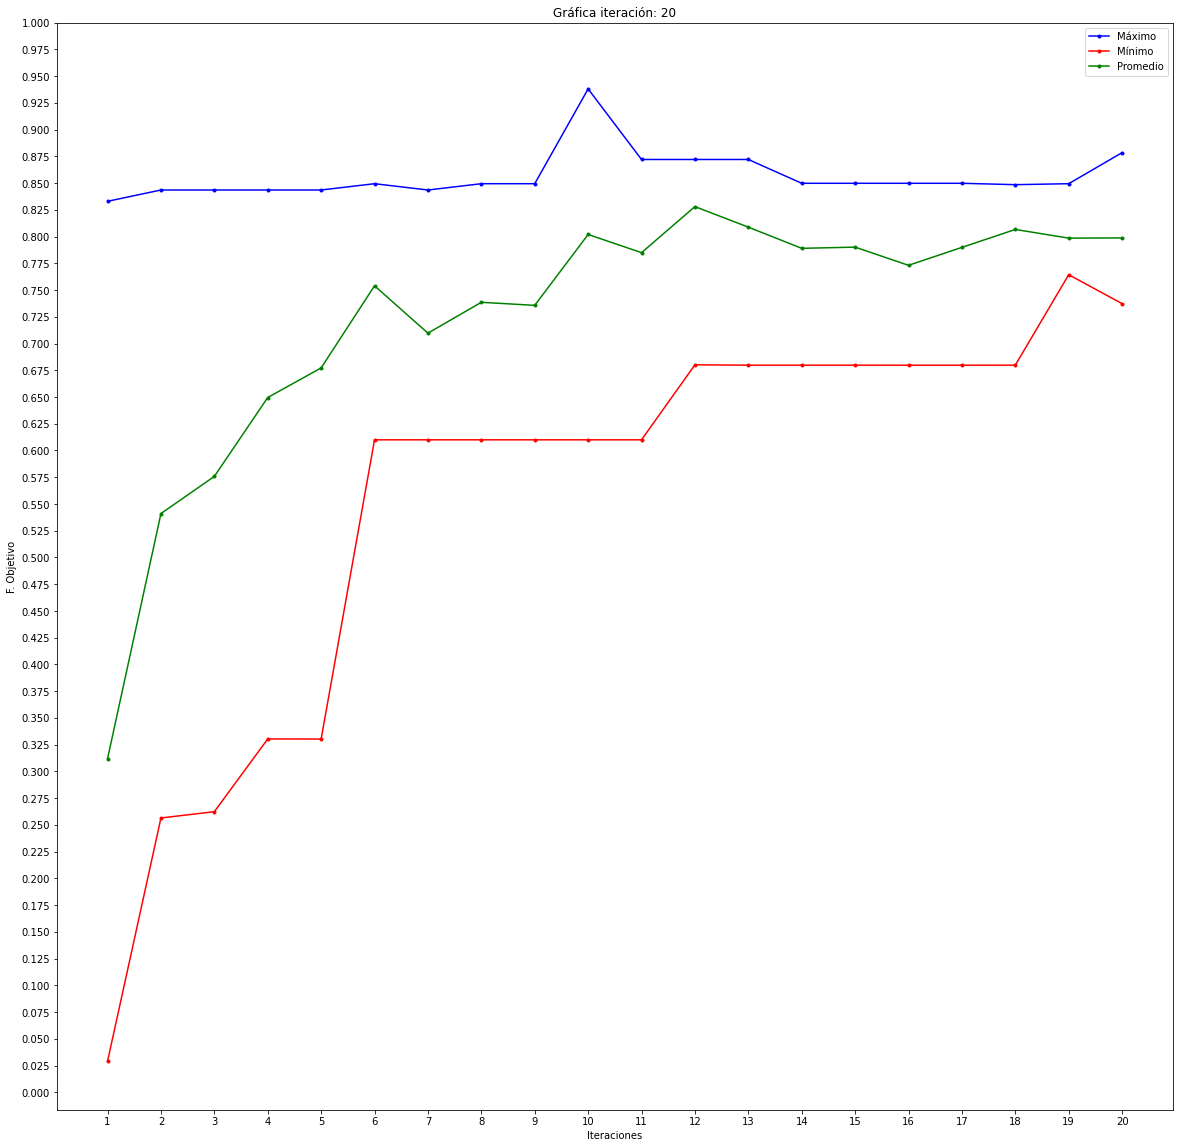

,Suma,Promedio,Máximo,Mínimo
Función objetivo,9.988125,0.998813,0.999008,0.997056
Fitness,1.000000,0.100000,0.100020,0.099824


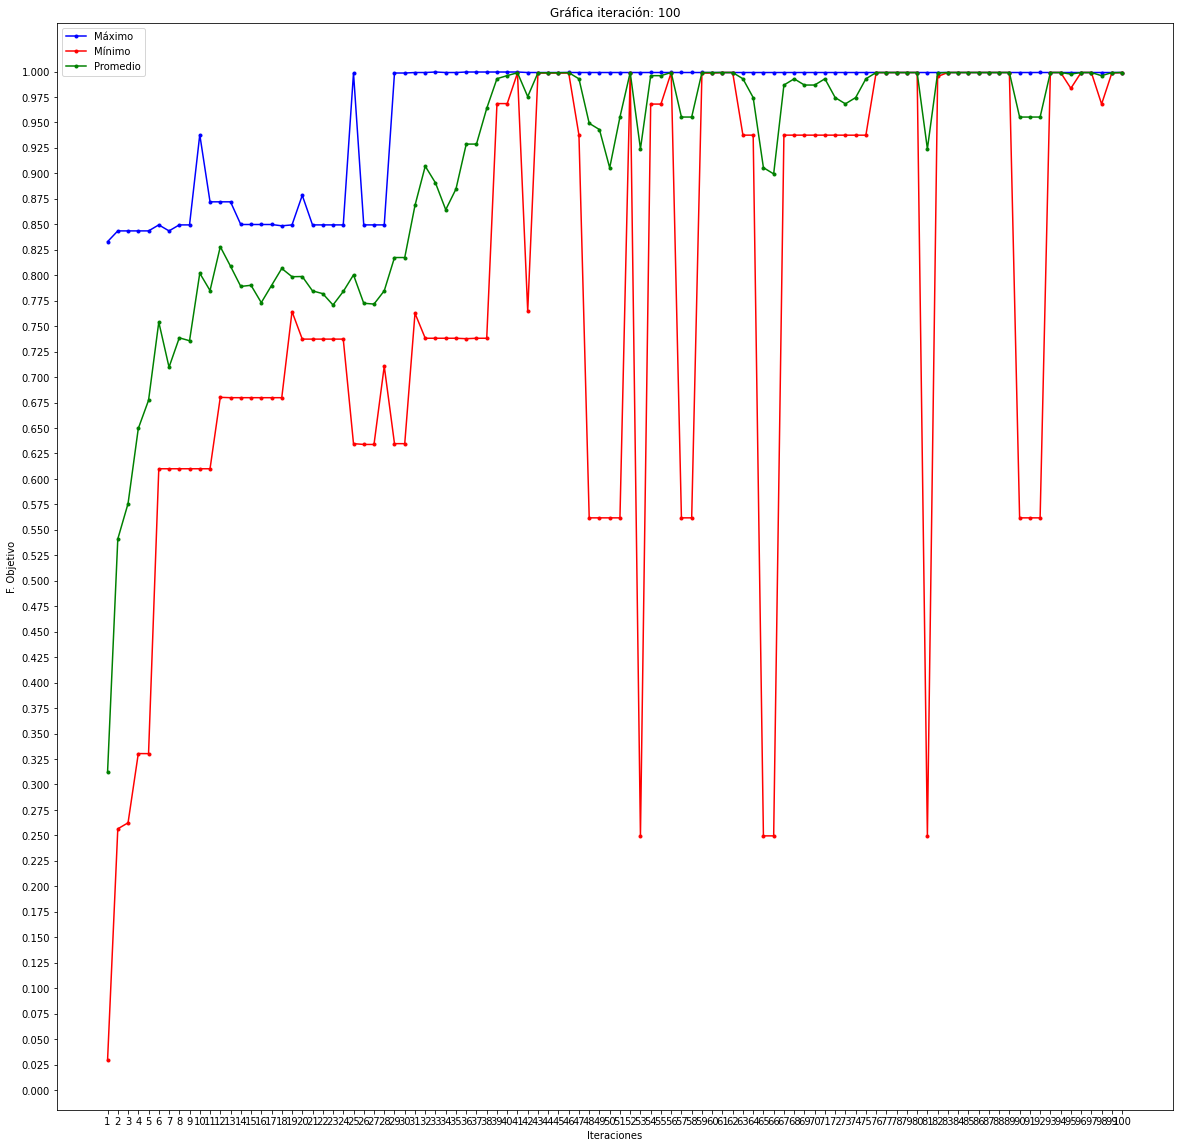

,Suma,Promedio,Máximo,Mínimo
Función objetivo,9.681134,0.968113,0.968978,0.968017
Fitness,1.000000,0.100000,0.100089,0.099990


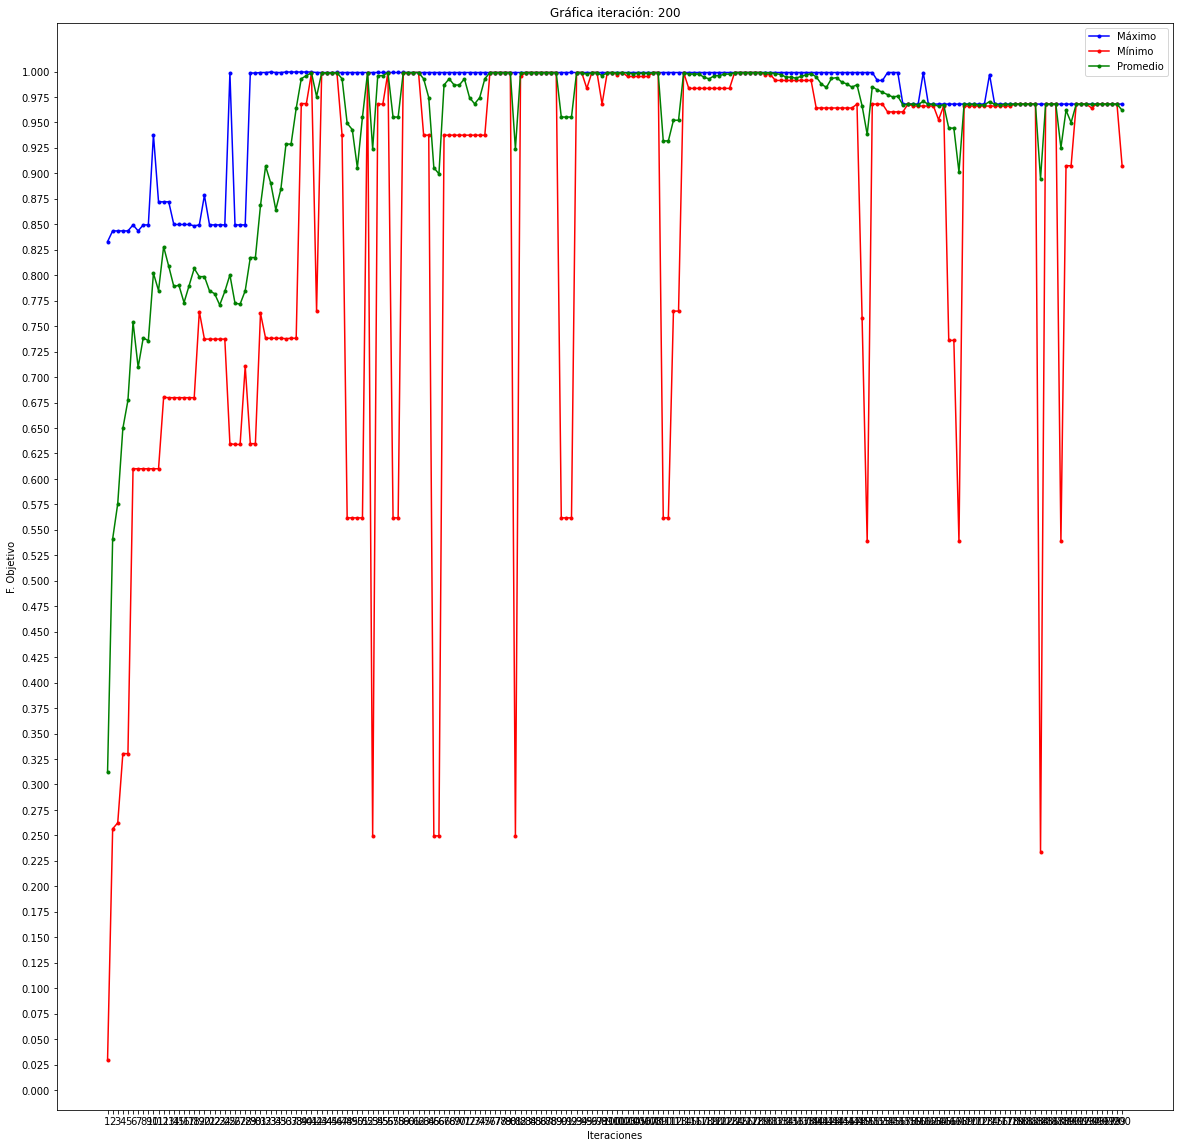

CASO B: Método selección torneo


,Suma,Promedio,Máximo,Mínimo
Función objetivo,9.109468,0.910947,0.910947,0.910947
Fitness,1.000000,0.100000,0.100000,0.100000


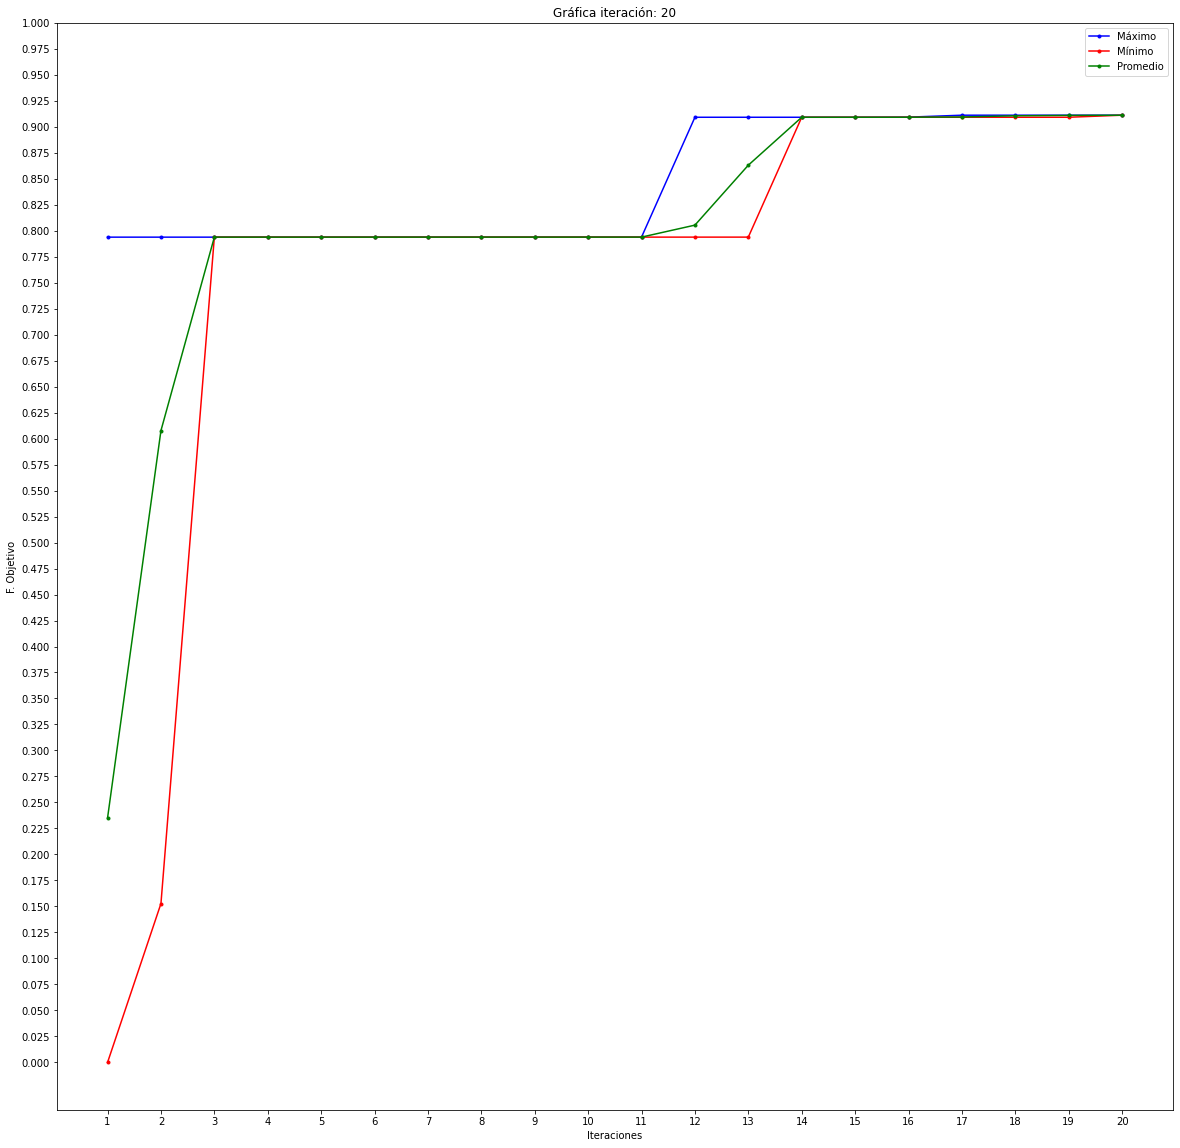

,Suma,Promedio,Máximo,Mínimo
Función objetivo,9.410176,0.941018,0.984375,0.550797
Fitness,1.000000,0.100000,0.104608,0.058532


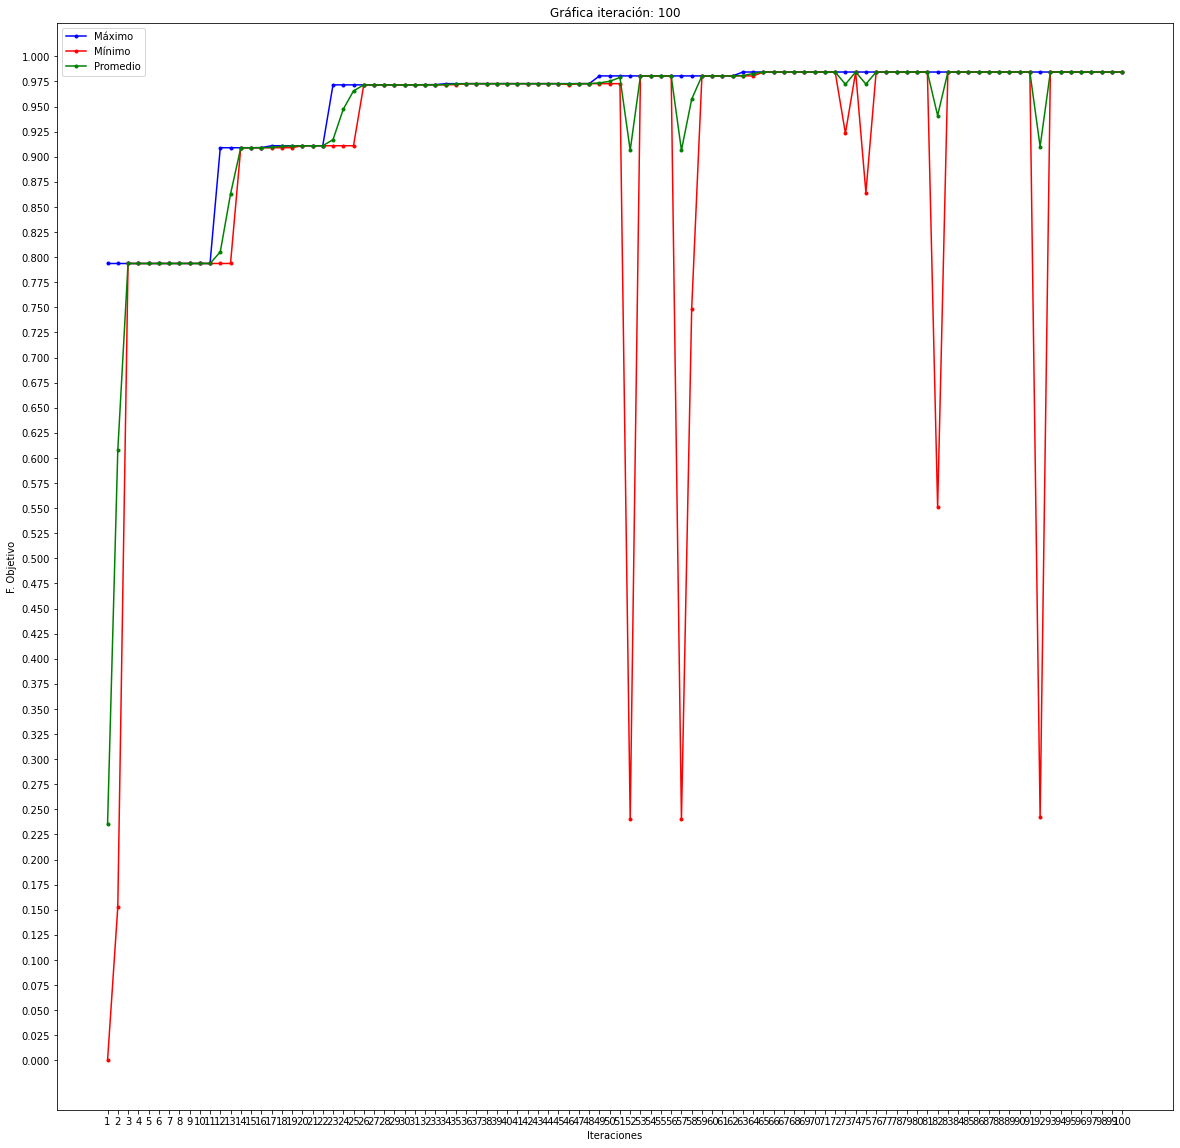

,Suma,Promedio,Máximo,Mínimo
Función objetivo,9.999390,0.999939,0.999939,0.999939
Fitness,1.000000,0.100000,0.100000,0.100000


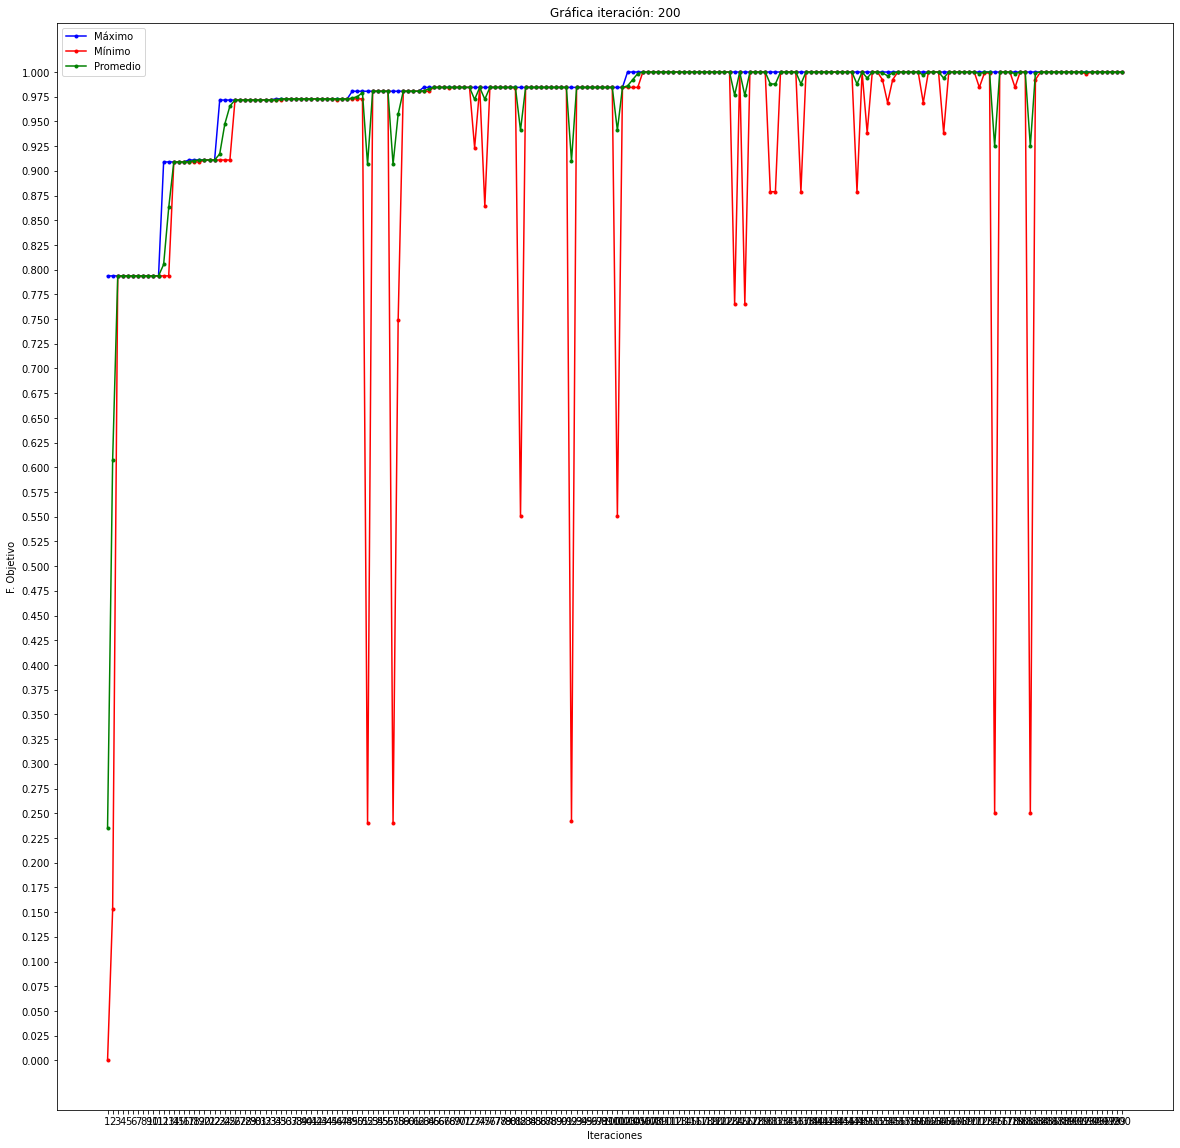

CASO C: Método selección Ruleta con elitismo


,Suma,Promedio,Máximo,Mínimo
Función objetivo,9.164597,0.916460,0.925498,0.910410
Fitness,1.000000,0.100000,0.100986,0.099340


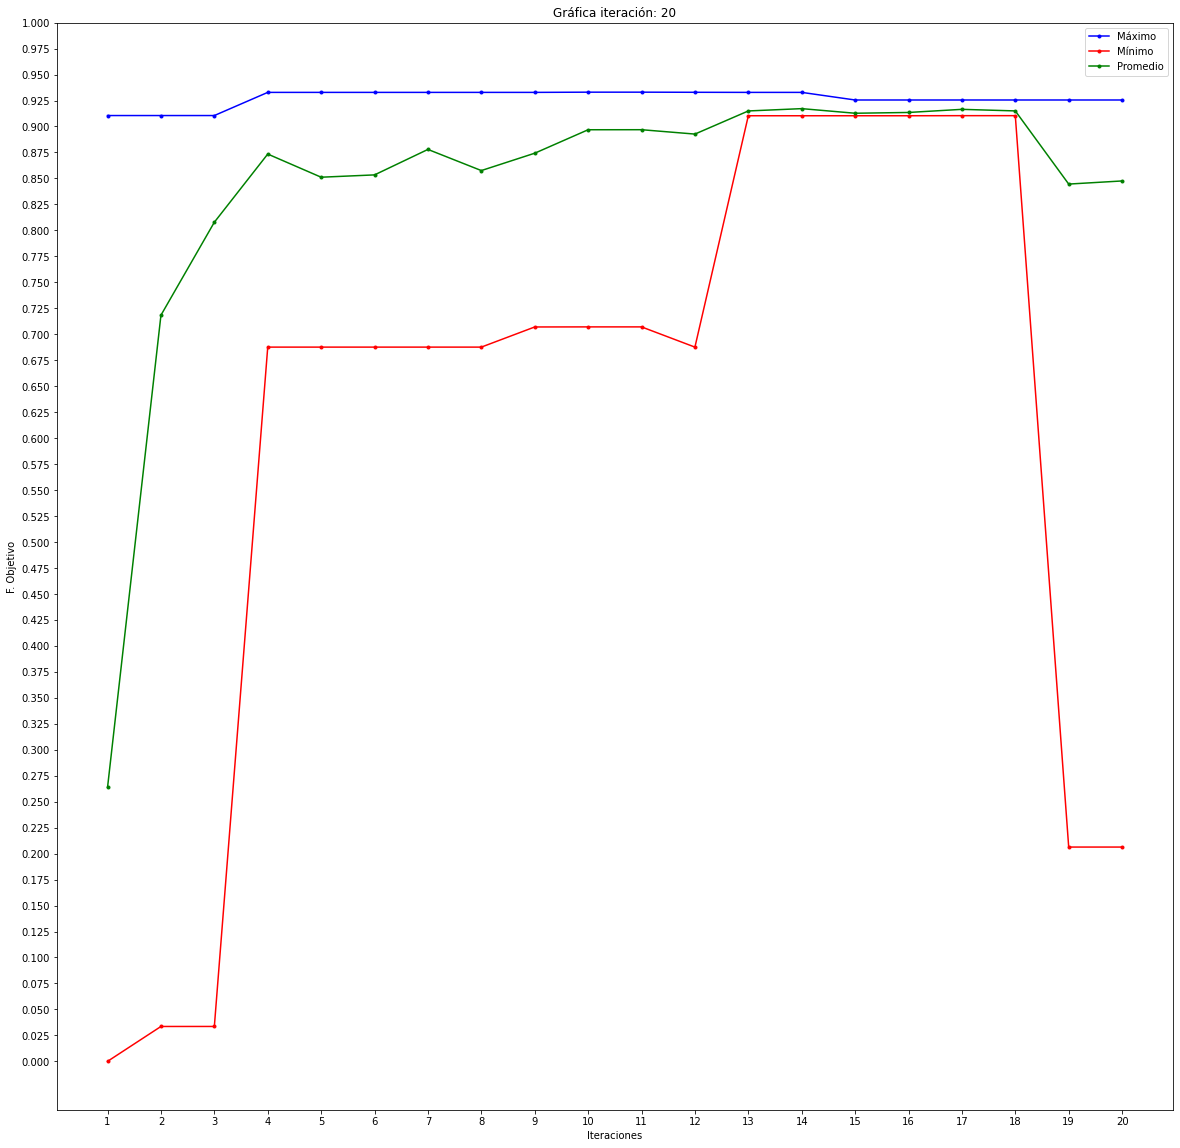

,Suma,Promedio,Máximo,Mínimo
Función objetivo,9.104778,0.910478,0.910527,0.910403
Fitness,1.000000,0.100000,0.100005,0.099992


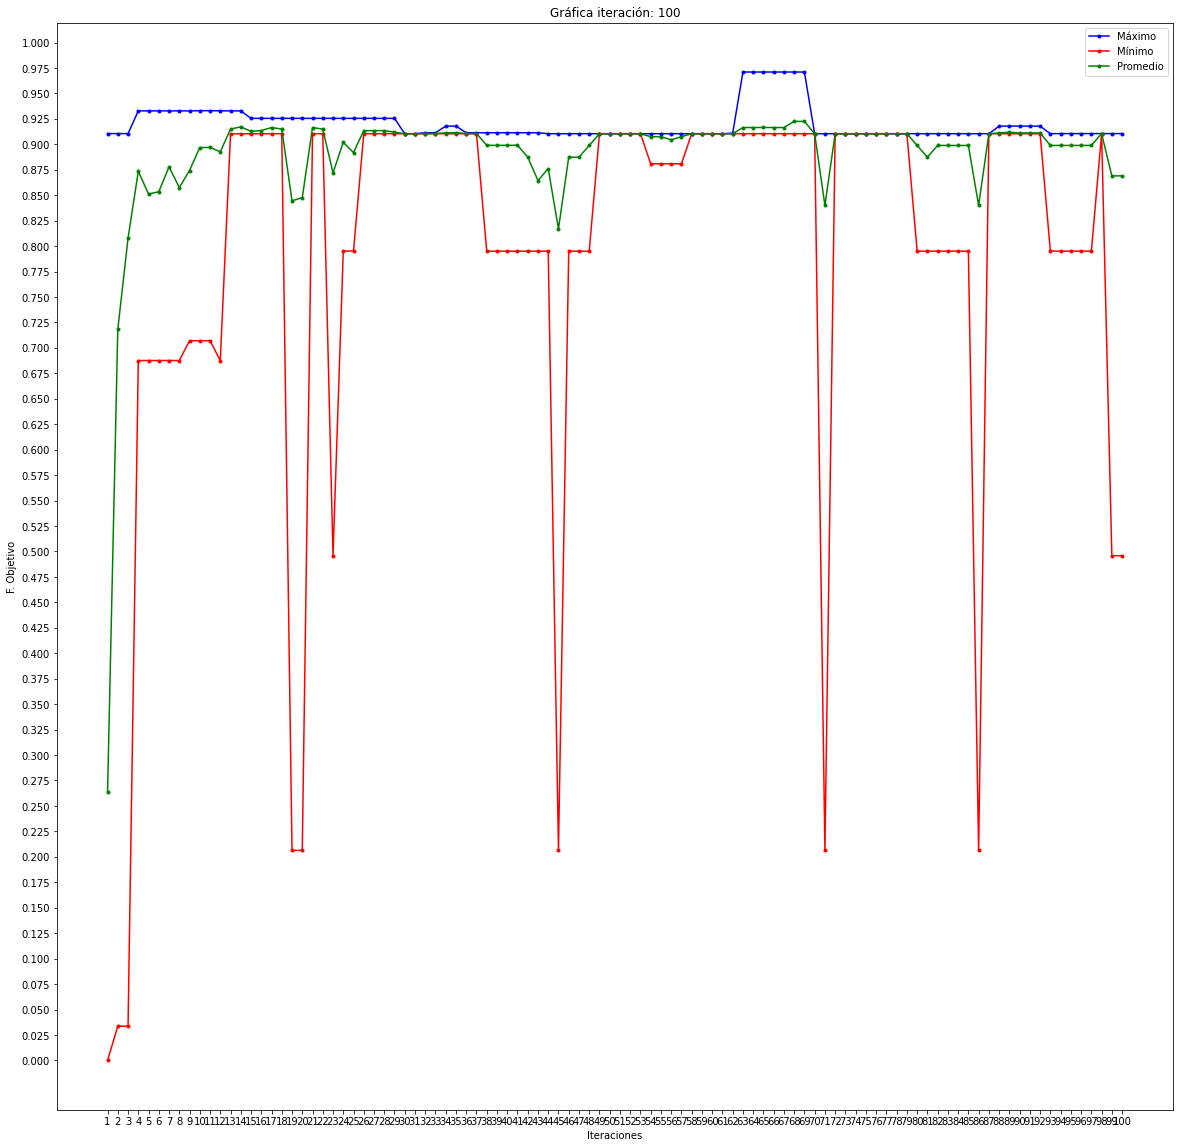

,Suma,Promedio,Máximo,Mínimo
Función objetivo,9.535379,0.953538,0.972548,0.910956
Fitness,1.000000,0.100000,0.101994,0.095534


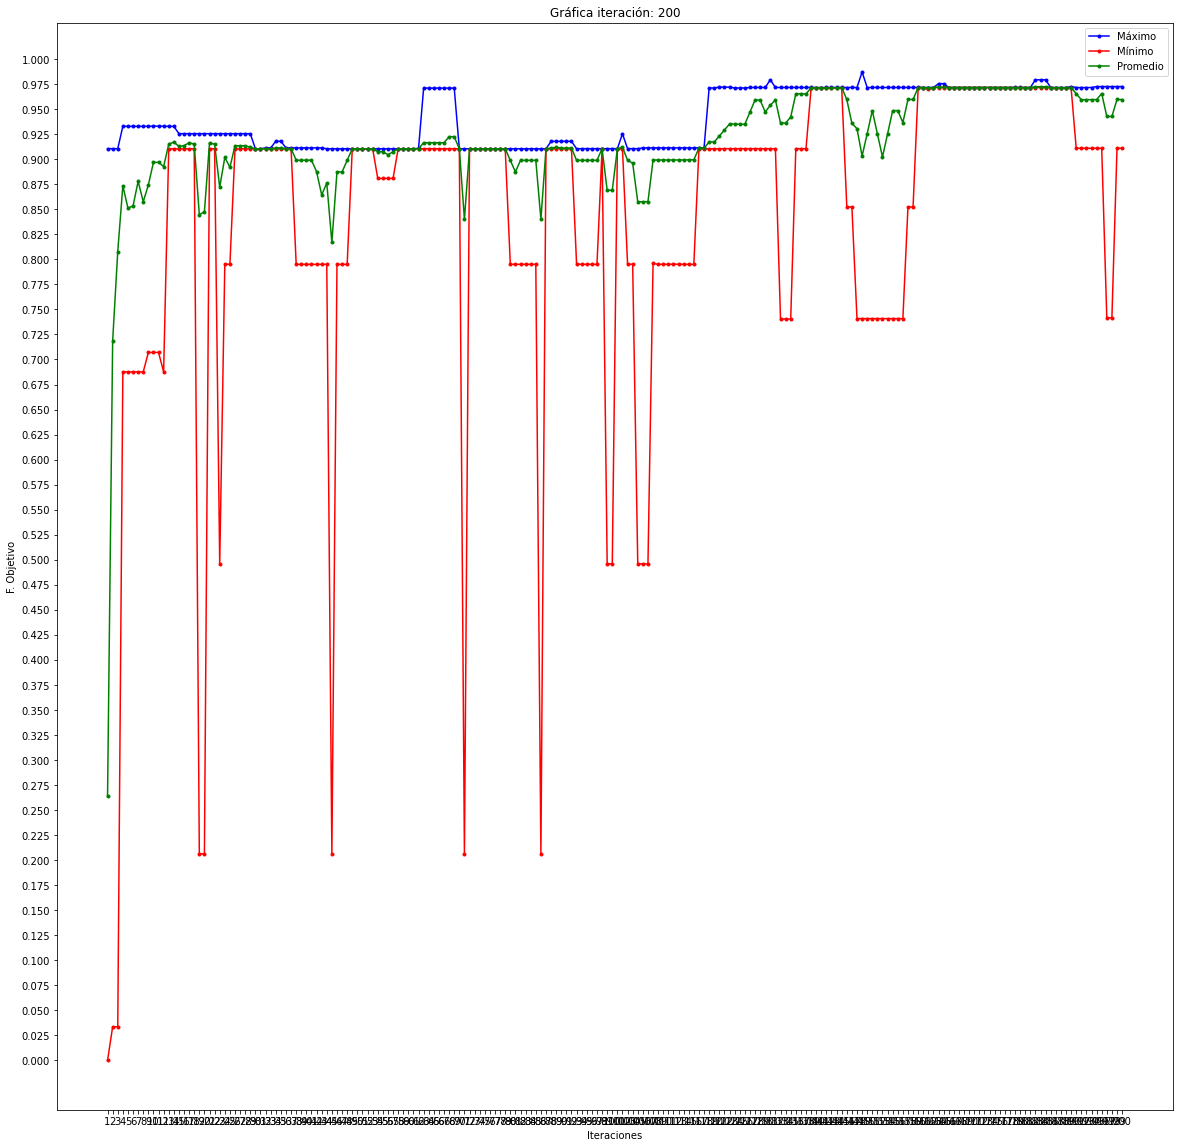

CASO C: Método selección torneo con elitismo


,Suma,Promedio,Máximo,Mínimo
Función objetivo,9.646969,0.964697,0.966227,0.950929
Fitness,1.000000,0.100000,0.100159,0.098573


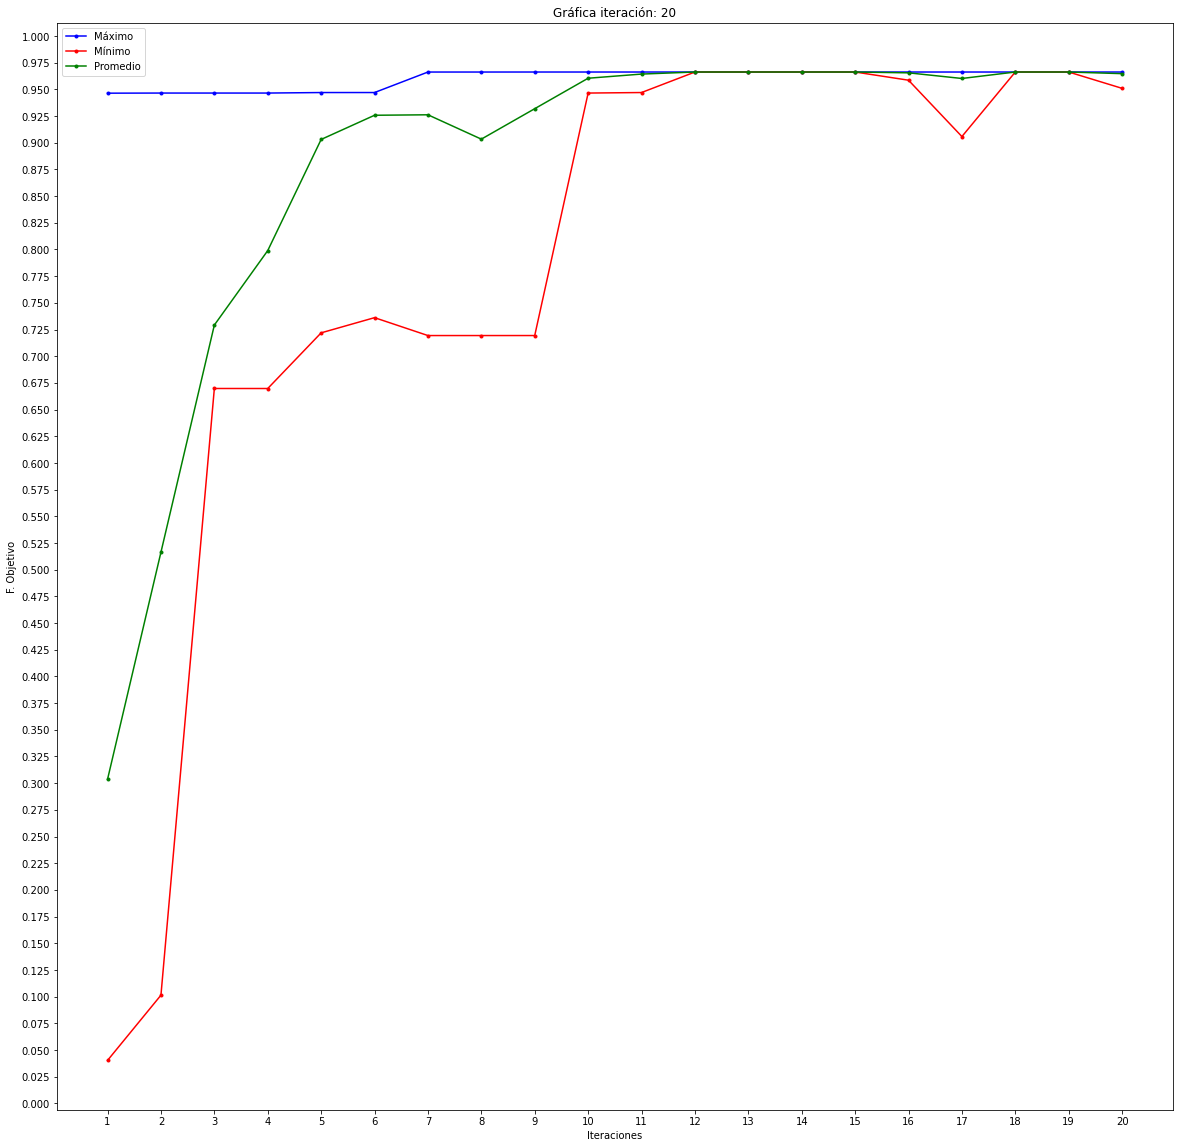

,Suma,Promedio,Máximo,Mínimo
Función objetivo,9.417733,0.941773,0.997556,0.560668
Fitness,1.000000,0.100000,0.105923,0.059533


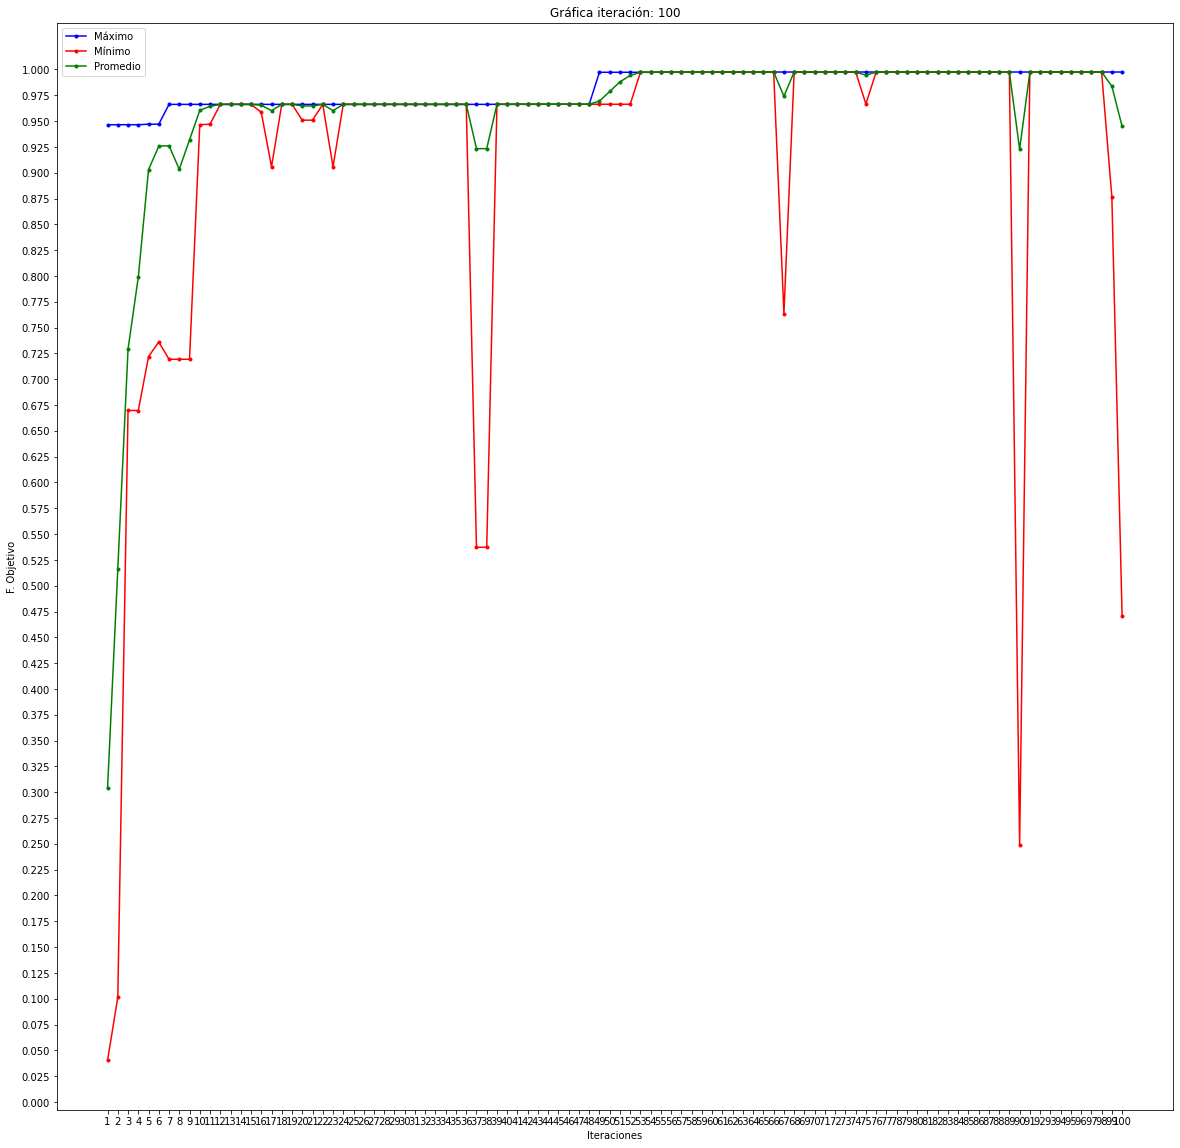

,Suma,Promedio,Máximo,Mínimo
Función objetivo,10.000000,1.000000,1.000000,1.000000
Fitness,1.000000,0.100000,0.100000,0.100000


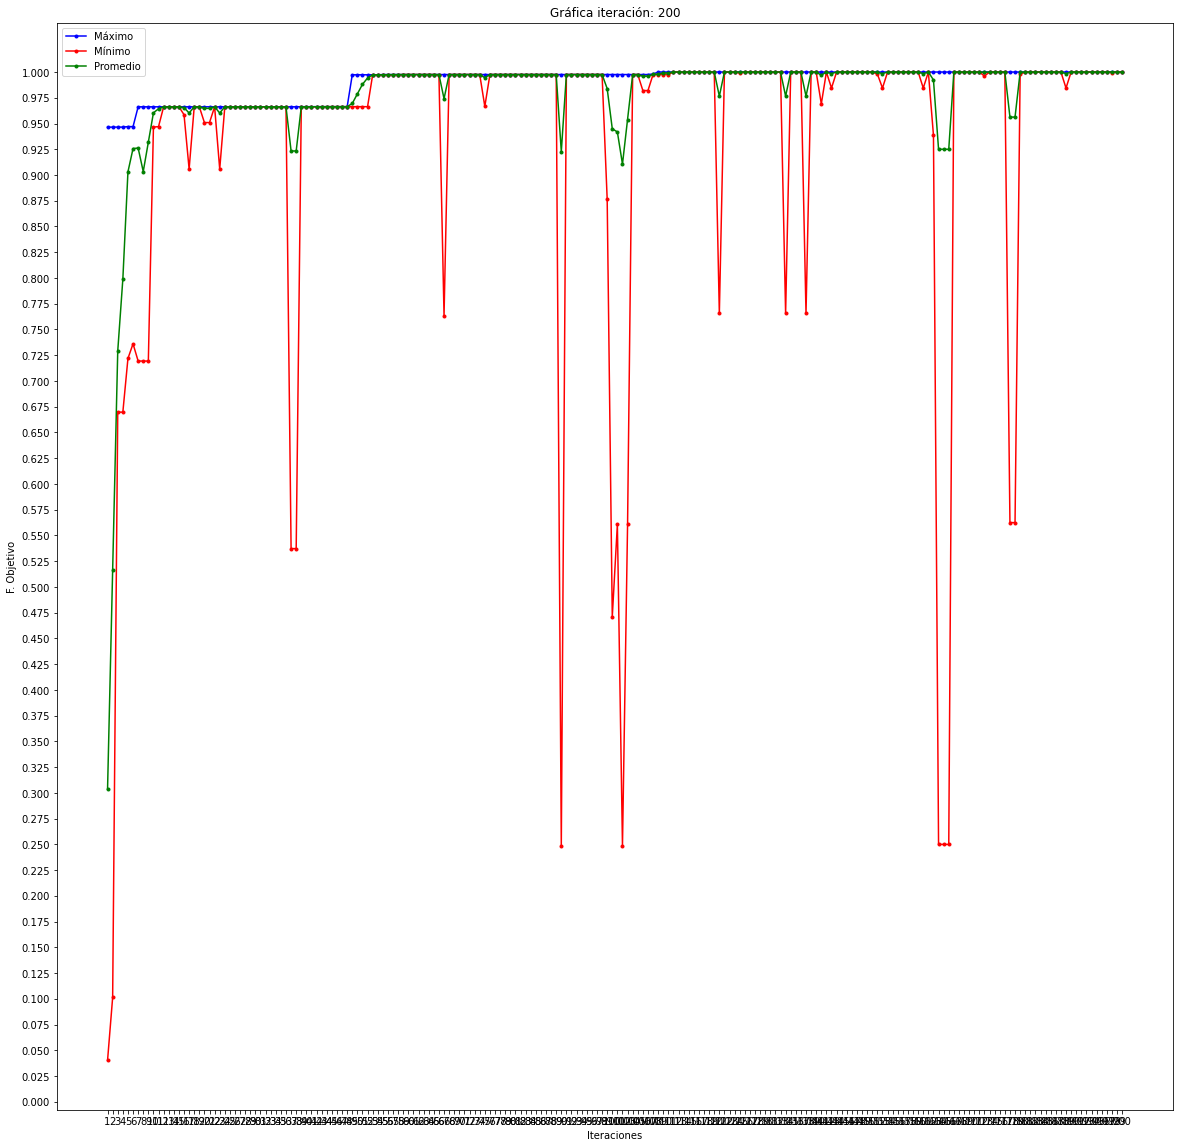

In [483]:
def main(seleccion, tieneElitismo = False, mutar = True): #TODO MOSTRAR TABLAS Y GRAFICOS, preguntar si esta bien que se hagan con los valores de fun. objetivo.
    estadisticas = { "Máximo":[], "Mínimo":[], "Promedio":[]}
    poblacion_decimal = poblacionInicial()
    poblacion_binarios = convertirPoblacion(poblacion_decimal)
    for i in range(0, CICLOS):
        marcoDeDatos = generarDataFrame(poblacion_decimal, poblacion_binarios)
        marcoDeDatos_stats, stats = generarEstadisticas(marcoDeDatos)
        estadisticas["Máximo"].append(stats['Máximo'][0])
        estadisticas["Mínimo"].append(stats['Mínimo'][0])
        estadisticas["Promedio"].append(stats['Promedio'][0])
        if tieneElitismo:
            elite, noElite = elitismo(poblacion_binarios, 2)
            marcoDeDatosNoElite = generarDataFrame(convertirPoblacion(noElite, False), noElite)
            cromosomasPadresNoElite = seleccion(marcoDeDatosNoElite, 8)
            cromosomasPadres = elite + cromosomasPadresNoElite
        else:
            cromosomasPadres = seleccion(marcoDeDatos, 10)
        cromosomasHijos = crossover(cromosomasPadres)
        if mutar: cromosomasHijosMutados = mutacion(cromosomasHijos)
        poblacion_binarios = cromosomasHijosMutados
        poblacion_decimal = convertirPoblacion(poblacion_binarios, False)
        if ( (i==(ITERACIONES_IMPRIMIBLES[0] - 1)) or (i==(ITERACIONES_IMPRIMIBLES[1] - 1)) or (i == (ITERACIONES_IMPRIMIBLES[2] - 1)) ): # 20, 100, 200. le resto 1 xq empieza en 0.
            marcoDeDatos = generarDataFrame(poblacion_decimal, poblacion_binarios)
            marcoDeDatos_stats, stats = generarEstadisticas(marcoDeDatos)
            
            display(marcoDeDatos_stats.style.set_table_attributes("style='display:inline'").set_caption('Tabla iteración: ' + str(i+1)))
            hacerGrafico(estadisticas, i+1)

# opciones extra hacer mismo grafico sin mutación. (Se ve como se estanca la función en maximos locales)
print("CASO A: Método selección ruleta")
main(ruleta)
print("CASO B: Método selección torneo")
main(torneo)
print("CASO C: Método selección Ruleta con elitismo")
main(ruleta, tieneElitismo = True)
print("CASO C: Método selección torneo con elitismo")
main(torneo, tieneElitismo = True)